In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import re

In [95]:
input_file = "test_output.txt"

heatmap = np.zeros(shape=(10,10))  # initializing the matrix
heatmap_median = np.zeros(shape=(10,10))

with open(input_file,"r") as file:
    lines = file.read()
    
    regex_heatmap = re.compile("heat-map \(x (\d)\) \(y (\d)\) \(h (\d+)\)")
    regex_action = re.compile("\(action (.+)\) \(x (\d)\) \(y (\d)\)")
    regex_k_cell = re.compile("k-cell \(x (\d)\) \(y (\d)\) \(content (.+)\)")
    
    coordinates = re.findall(regex_heatmap, lines)
    actions = re.findall(regex_action, lines)
    k_cells = re.findall(regex_k_cell, lines)
    
    print(actions)
    print(k_cells)
    
    for c in coordinates:
        x = int(c[0])
        y = int(c[1])
        value = int(c[2])
        heatmap[x,y] = value
        
        if value == 100:
            heatmap_median[x,y] = 6
        else:
            heatmap_median[x,y] = value
    
    print(heatmap)  # DEBUG
    print(heatmap_median)  # DEBUG

[('fire', '4', '6'), ('fire', '9', '6'), ('fire', '4', '2'), ('fire', '9', '2'), ('fire', '0', '0'), ('fire', '4', '6'), ('fire', '9', '6'), ('fire', '4', '2'), ('fire', '9', '2'), ('fire', '0', '0')]
[('0', '9', 'sub)'), ('4', '6', 'top)'), ('3', '5', 'water)'), ('3', '6', 'water)'), ('3', '7', 'water)'), ('4', '5', 'water)'), ('4', '7', 'water)'), ('5', '5', 'water)'), ('5', '7', 'water)'), ('4', '2', 'top)'), ('3', '1', 'water)'), ('3', '2', 'water)'), ('3', '3', 'water)'), ('4', '1', 'water)'), ('4', '3', 'water)'), ('5', '1', 'water)'), ('5', '3', 'water)'), ('0', '0', 'sub)'), ('9', '2', 'water)'), ('9', '6', 'water)'), ('0', '9', 'sub)'), ('4', '6', 'top)'), ('3', '5', 'water)'), ('3', '6', 'water)'), ('3', '7', 'water)'), ('4', '5', 'water)'), ('4', '7', 'water)'), ('5', '5', 'water)'), ('5', '7', 'water)'), ('4', '2', 'top)'), ('3', '1', 'water)'), ('3', '2', 'water)'), ('3', '3', 'water)'), ('4', '1', 'water)'), ('4', '3', 'water)'), ('5', '1', 'water)'), ('5', '3', 'water)')

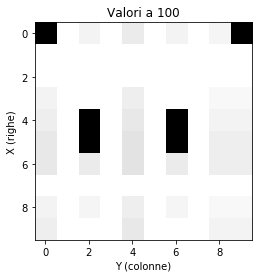

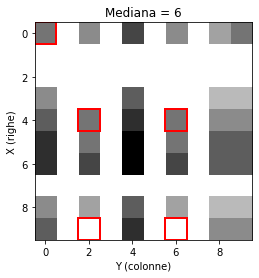

In [102]:
def highlight_cell(y, x, ax=None, **kwargs):
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect


def annotate_cell(text, x, y):
    ax.text(x, y, heatmap[x, y], ha="center", va="center", color="r")


def annotate_heatmap():
    for c in actions:
        x = int(c[1])
        y = int(c[2])
        if c[0] == "fire":
            highlight_cell(x,y, color="red", linewidth=2)
            
    for c2 in k_cells:
        x = int(c2[0])
        y = int(c2[1])
        content = c2[2]
        annotate_cell(content, x, y)
        

# Cmap reference https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
plt.imshow(heatmap, cmap="binary", interpolation='nearest')
plt.xlabel("Y (colonne)")
plt.ylabel("X (righe)")
plt.title("Valori a 100")
# annotate_heatmap()
plt.show()

plt.imshow(heatmap_median, cmap="binary", interpolation='nearest')
plt.xlabel("Y (colonne)")
plt.ylabel("X (righe)")
plt.title("Mediana = 6")
# annotate_heatmap()
plt.show()